In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (145, 145, 200)
y: (145, 145)


In [4]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

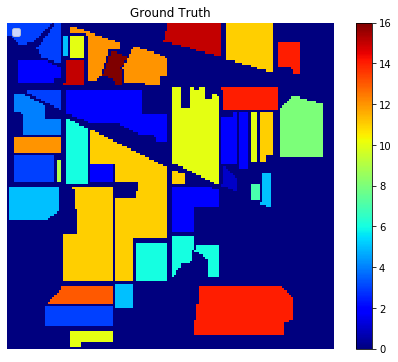

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
_,F,S = X.shape

In [7]:
print(F,"  ",S)

145    200


In [8]:
D1= X[:,:,0:36] 
print(D1.shape)
D2= X[:,:,36:102] 
print(D2.shape)
D3= X[:,:,102:] 
print(D3.shape)

(145, 145, 36)
(145, 145, 66)
(145, 145, 98)


In [10]:
_,F1,S1 = D1.shape
_,F2,S2 = D2.shape
_,F3,S3 = D3.shape
print(F1,"  ",S1)
print(F2,"  ",S2)
print(F3,"  ",S3)

145    36
145    66
145    98


In [11]:
M = X.T.mean(axis=0)
M.shape

(145, 145)

In [12]:
M=M.T;
M.shape

(145, 145)

In [13]:
M1=D1.T.mean(axis=0)
M1.shape

(145, 145)

In [14]:
M1=M1.T;
M1.shape

(145, 145)

In [15]:
M2=D2.T.mean(axis=0)
M2.shape

(145, 145)

In [16]:
M2=M2.T;
M2.shape

(145, 145)

In [17]:
M3=D3.T.mean(axis=0)
M3.shape

(145, 145)

In [18]:
M3=M3.T;
M3.shape

(145, 145)

In [19]:
np.stack([M1 for _ in range(S1)], axis=2).shape

(145, 145, 36)

In [20]:
I1 = (D1 - np.stack([M1 for _ in range(S1)], axis=2)); 
I1 = I1.reshape(I1.shape[0]*I1.shape[1], I1.shape[2])
I1.shape

(21025, 36)

In [21]:
I2 = (D2 - np.stack([M2 for _ in range(S2)], axis=2)); 
I2 = I2.reshape(I2.shape[0]*I2.shape[1], I2.shape[2])
I2.shape

(21025, 66)

In [22]:
I3 = (D3 - np.stack([M3 for _ in range(S3)], axis=2)); 
I3 = I3.reshape(I3.shape[0]*I3.shape[1], I3.shape[2])
I3.shape

(21025, 98)

In [23]:
def applyPCA(X, numComponents, isReshape = True, drawPlot = False, layerNo = 1):
    if isReshape == True:
        newX = np.reshape(X, (-1, X.shape[2]))
        pca = PCA(n_components=numComponents, whiten=True)
        newX = pca.fit_transform(newX)
        newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    else: 
        pca = PCA(n_components=numComponents, svd_solver='full')
        newX = pca.fit_transform(X)
        if drawPlot == True:
            drawPCAPlot(pca.explained_variance_ratio_,numComponents, layerNo)
    return newX, pca.explained_variance_ratio_

In [24]:
SX1,pca1 = applyPCA(I1,numComponents = 0.99,isReshape = False)
SX1.shape

(21025, 24)

In [25]:
SX2,pca2 = applyPCA(I2,numComponents = 0.99,isReshape = False)
SX2.shape

(21025, 23)

In [26]:
SX3,pca3 = applyPCA(I3,numComponents = 0.99,isReshape = False)
SX3.shape

(21025, 2)

In [27]:
SX= np.concatenate([SX1.T,SX2.T,SX3.T])
SX = SX.T
SX.shape

(21025, 49)

In [28]:
pca1

array([0.66058245, 0.0635636 , 0.04970123, 0.04234367, 0.03031121,
       0.02422677, 0.02201408, 0.01901576, 0.01562553, 0.00972479,
       0.00850695, 0.0073779 , 0.00571073, 0.00483182, 0.00355988,
       0.0032634 , 0.00320752, 0.00295587, 0.00292503, 0.00284339,
       0.00247453, 0.00232589, 0.0019893 , 0.00147348])

In [29]:
pca_var = []
pca_var = np.concatenate([pca1,pca2,pca3])
pca_var = sorted(pca_var, reverse = True)
MAX = max(np.cumsum(pca_var))
pca_var = np.round((pca_var)/MAX,3)
np.cumsum(pca_var)

array([0.331, 0.601, 0.823, 0.844, 0.861, 0.876, 0.89 , 0.9  , 0.91 ,
       0.918, 0.926, 0.933, 0.939, 0.945, 0.95 , 0.955, 0.959, 0.962,
       0.965, 0.968, 0.971, 0.973, 0.975, 0.977, 0.979, 0.981, 0.982,
       0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 , 0.991,
       0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.997, 0.997, 0.997,
       0.997, 0.997, 0.997, 0.997])

[0.331 0.27  0.222 0.021 0.017 0.015 0.014 0.01  0.01  0.008 0.008 0.007
 0.006 0.006 0.005 0.005 0.004 0.003 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.   ]


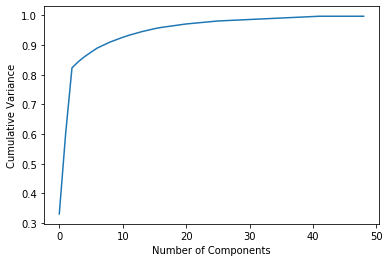

In [30]:
print(pca_var)
plt.figure()
plt.plot(np.cumsum(pca_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance') #for each component
#plt.title('Inidian_pines Dataset Explained Variance')
plt.savefig('indian_pines_explainedvariance_final1')
plt.show()

In [31]:
y = y.ravel()

In [32]:
print(SX.shape)
print(y.shape)

(21025, 49)
(21025,)


In [33]:
X = (SX[y>0,:])
Y = (y[y>0])

In [34]:
print(X.shape)
print(Y.shape)

(10249, 49)
(10249,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.25, stratify=Y )

In [36]:
print(X_train.shape)
print(X_test.shape)

(7686, 49)
(2563, 49)


In [37]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

       0
1     35
2   1071
3    622
4    178
5    362
6    547
7     21
8    358
9     15
10   729
11  1841
12   445
13   154
14   949
15   289
16    70
      0
1    11
2   357
3   208
4    59
5   121
6   183
7     7
8   120
9     5
10  243
11  614
12  148
13   51
14  316
15   97
16   23


In [38]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
#Appplying SVM 

from sklearn.svm import SVC
from sklearn import metrics

In [40]:
classifiers = []

Train_acc=[]
Valid_acc=[]
accuracy = -1
accuracy_train = -1
for C in np.arange(1,102,25):
    for gamma in np.arange(0.001,0.1,0.005):
        
        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train =metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)
        if (acc_train>accuracy_train):
            
            accuracy_train=acc_train
            best_c_train = C
            best_g_train=gamma
        print("C_train= ",C," Best C_train = ",best_c_train," gamma_train = ",gamma," best_gamma_train= ",best_g_train," Accuracy_train = ",acc_train," Best Accuracy_train = ",accuracy_train,"\n")

        if (acc>accuracy):
            accuracy=acc
            best_c = C
            best_g=gamma
        
        print("C= ",C," Best C = ",best_c," gamma = ",gamma," best_gamma= ",best_g," Accuracy = ",acc," Best Accuracy = ",accuracy,"\n")
        
        

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.001  best_gamma_train=  0.001  Accuracy_train =  0.6344002081707  Best Accuracy_train =  0.6344002081707 

C=  1  Best C =  1  gamma =  0.001  best_gamma=  0.001  Accuracy =  0.6180257510729614  Best Accuracy =  0.6180257510729614 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.006  best_gamma_train=  0.006  Accuracy_train =  0.7569607077803799  Best Accuracy_train =  0.7569607077803799 

C=  1  Best C =  1  gamma =  0.006  best_gamma=  0.006  Accuracy =  0.7284432305891534  Best Accuracy =  0.7284432305891534 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.011  best_gamma_train=  0.011  Accuracy_train =  0.7950819672131147  Best Accuracy_train =  0.7950819672131147 

C=  1  Best C =  1  gamma =  0.011  best_gamma=  0.011  Accuracy =  0.755

C_train=  26  Best C_train =  26  gamma_train =  0.016  best_gamma_train=  0.016  Accuracy_train =  0.9729378090033828  Best Accuracy_train =  0.9729378090033828 

C=  26  Best C =  26  gamma =  0.016  best_gamma=  0.011  Accuracy =  0.8443230589153335  Best Accuracy =  0.8451033944596177 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.021  best_gamma_train=  0.021  Accuracy_train =  0.9845173041894353  Best Accuracy_train =  0.9845173041894353 

C=  26  Best C =  26  gamma =  0.021  best_gamma=  0.011  Accuracy =  0.8408115489660554  Best Accuracy =  0.8451033944596177 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.026000000000000002  best_gamma_train=  0.026000000000000002  Accuracy_train =  0.9902419984387197  Best Accuracy_train =  0.9902419984387197 

C=  26  Best C =  26  gamma =  0.026000000000000002  best_gamma=  0.011  Accuracy =  0.83417

C_train=  51  Best C_train =  26  gamma_train =  0.036000000000000004  best_gamma_train=  0.076  Accuracy_train =  0.9993494665625813  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.036000000000000004  best_gamma=  0.006  Accuracy =  0.8271556769410847  Best Accuracy =  0.8478345688646118 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.041  best_gamma_train=  0.076  Accuracy_train =  0.9997397866250325  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.041  best_gamma=  0.006  Accuracy =  0.8162309793211081  Best Accuracy =  0.8478345688646118 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.046  best_gamma_train=  0.076  Accuracy_train =  0.9998698933125163  Best Accuracy_train =  1.0 

C=  51  Best C =  51  gamma =  0.046  best_gamma=  0.006  Accuracy =  0.8084276238782676  Best Accuracy =  0.8478345688646118 

---------

C_train=  76  Best C_train =  26  gamma_train =  0.056  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.056  best_gamma=  0.006  Accuracy =  0.7932110807647288  Best Accuracy =  0.8478345688646118 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.061  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.061  best_gamma=  0.006  Accuracy =  0.7881388997268826  Best Accuracy =  0.8478345688646118 

----------------------------------------------------------------
C_train=  76  Best C_train =  26  gamma_train =  0.066  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  76  Best C =  51  gamma =  0.066  best_gamma=  0.006  Accuracy =  0.7846273897776044  Best Accuracy =  0.8478345688646118 

----------------------------------------------------------------
C_train=  76  Best 

C_train=  101  Best C_train =  26  gamma_train =  0.081  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.081  best_gamma=  0.006  Accuracy =  0.7639484978540773  Best Accuracy =  0.8493952399531799 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.08600000000000001  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.08600000000000001  best_gamma=  0.006  Accuracy =  0.7580959812719469  Best Accuracy =  0.8493952399531799 

----------------------------------------------------------------
C_train=  101  Best C_train =  26  gamma_train =  0.091  best_gamma_train=  0.076  Accuracy_train =  1.0  Best Accuracy_train =  1.0 

C=  101  Best C =  101  gamma =  0.091  best_gamma=  0.006  Accuracy =  0.7518532969176746  Best Accuracy =  0.8493952399531799 

-----------------------------------------------

In [41]:
clf = SVC(C=101,gamma=0.006,decision_function_shape='ovo')

In [42]:
clf.fit(X_train, y_train)

SVC(C=101, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.006, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 84.93952399531798


In [45]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 82.78018760255245


In [48]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
print(confusion_matrix(y_test, y_pred ))
#print(classification_report(y_test, y_pred ))

[[  9   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0]
 [  0 295   8   2   1   0   0   0   0  14  35   1   0   0   1   0]
 [  0  17 138   6   0   0   0   0   0   1  39   7   0   0   0   0]
 [  0   5   9  40   0   1   0   1   0   1   2   0   0   0   0   0]
 [  0   1   0   3 110   0   1   0   0   0   2   1   0   1   2   0]
 [  0   0   0   0   1 170   0   0   0   2   0   0   0   0  10   0]
 [  0   0   0   0   0   0   6   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   4   0   0   0   0   0   0   0]
 [  0  10  11   0   0   0   0   0   0 190  30   2   0   0   0   0]
 [  0  28  14   2   1   0   1   0   0  31 532   5   0   0   0   0]
 [  0   3   9   2   1   0   0   0   0   4   5 124   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   1 301  11   0]
 [  0   1   1   1   3   5   0   0   0   0   1   0   1  20  64 

In [49]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.82      0.83      0.82       357
           3       0.73      0.66      0.69       208
           4       0.71      0.68      0.70        59
           5       0.91      0.91      0.91       121
           6       0.96      0.93      0.94       183
           7       0.75      0.86      0.80         7
           8       0.98      1.00      0.99       120
           9       1.00      0.80      0.89         5
          10       0.78      0.78      0.78       243
          11       0.82      0.87      0.84       614
          12       0.89      0.84      0.86       148
          13       0.96      1.00      0.98        51
          14       0.93      0.95      0.94       316
          15       0.73      0.66      0.69        97
          16       1.00      1.00      1.00        23

    accuracy                           0.85      2563
   macro avg       0.87   